In [ ]:
import networkx as nx
import numpy as np
from collections import deque


**Exercise 3.4:** In Section 3.10, I claimed that Dijkstra's algorithm does not work unless it uses BFS. Write a version of ```shortest_path_dijkstra``` that uses DFS and test it on a few examples to see what goes wrong.



---


Answer

---

Below is the implementation of ```shortest_path_dijkstra``` from the book.


In [ ]:
def shortest_path_dijkstra(G, source):

    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1

        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

To revert this back into using DFS, we simply replace ```.popleft()``` with ```.pop()``` since that's what we did in the first place to make a BFS.

In [ ]:
def shortest_path_dijkstra_DFS(G, source):

    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.pop()
        new_dist = dist[node] + 1

        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

We now test these two implementations by using the ```make_ring_lattice``` implementation from the book.

In [ ]:
def adjacent_edges(nodes, halfk):

    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v
def make_ring_lattice(n, k):

    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

In [ ]:
a = shortest_path_dijkstra(make_ring_lattice(10,3),0)
b = shortest_path_dijkstra_DFS(make_ring_lattice(10,3),0)

a == b

False

In [ ]:
print(make_ring_lattice(10,4)[0])

{1: {}, 2: {}, 8: {}, 9: {}}


The reason for this is the path length will be different that that of when using ```popleft()```. 

Another great example to demonstrate this by considering two right triangles above each other:

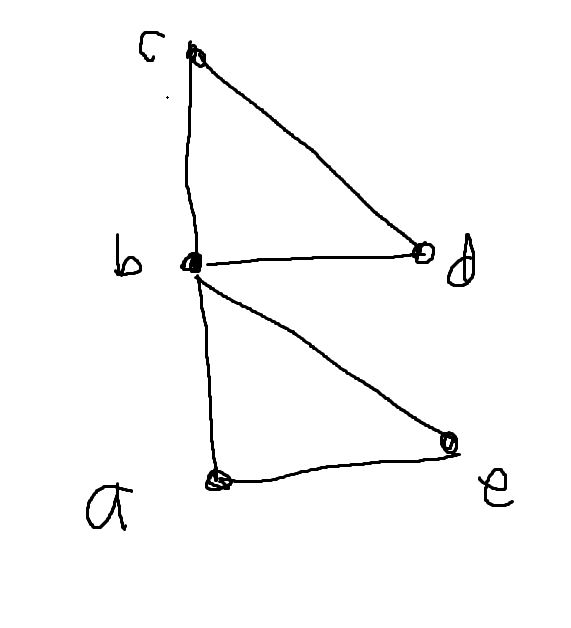

If we implement DFS and BFS, of course given an edge length for each node, we will see that there will be accountabilities present in each algorithm used.



